<a href="https://colab.research.google.com/github/allviaf/sales-forecasting-linear-regression/blob/main/sales_forecasting_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries and load data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
# Load data
df = pd.read_csv("monthly_sales.csv", parse_dates=["Month"])
# Preview
print(df.head())


       Month  Sales
0 2023-01-01  10200
1 2023-02-01   9800
2 2023-03-01  11000
3 2023-04-01  11500
4 2023-05-01  12000


In [3]:
df.set_index("Month", inplace=True)
# Preview
print(df.head())


            Sales
Month            
2023-01-01  10200
2023-02-01   9800
2023-03-01  11000
2023-04-01  11500
2023-05-01  12000


# Add a numeric time index for modelling

In [5]:
# Create numeric index for time
df['Month_num'] = np.arange(len(df))
print(df)

            Sales  Month_num
Month                       
2023-01-01  10200          0
2023-02-01   9800          1
2023-03-01  11000          2
2023-04-01  11500          3
2023-05-01  12000          4
2023-06-01  12500          5
2023-07-01  13000          6
2023-08-01  12700          7
2023-09-01  13500          8
2023-10-01  14000          9
2023-11-01  13800         10
2023-12-01  14500         11
2024-01-01  15000         12
2024-02-01  15200         13
2024-03-01  14800         14
2024-04-01  15500         15
2024-05-01  15800         16
2024-06-01  16000         17
2024-07-01  16200         18
2024-08-01  16400         19
2024-09-01  16800         20
2024-10-01  17000         21
2024-11-01  17200         22
2024-12-01  17400         23


# Train a Linear Regression Model

In [6]:
# Split features and target
X = df[['Month_num']]
y = df['Sales']

# Fit model
model = LinearRegression()
model.fit(X, y)


LinearRegression()

# Predict bext three months

In [10]:
# Predict next 3 months
future_months = pd.DataFrame({'Month_num': [len(df), len(df)+1, len(df)+2]})
future_sales = model.predict(future_months)

# Show forecast
for i, val in enumerate(future_sales, 1):
    print(f"Month +{i}: ₹{int(val)}")

Month +1: ₹18169
Month +2: ₹18484
Month +3: ₹18798


# Visualize Forecast

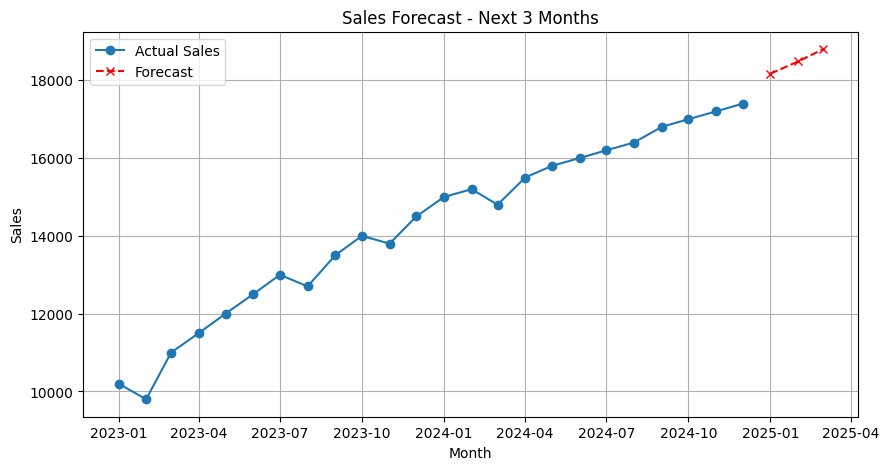

In [11]:
# Extend index for plotting
future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=3, freq='MS')

# Plot actual + forecast
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Sales'], marker='o', label='Actual Sales')
plt.plot(future_dates, future_sales, marker='x', linestyle='--', color='red', label='Forecast')
plt.title("Sales Forecast - Next 3 Months")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()